In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=45 #to see all columns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data that was scraped earlier into Pandas Data frame
df = pd.read_csv('DoorDash_data.csv')

In [3]:
# Let's have look a the shape
df.shape

(1421799, 36)

In [4]:
# let's have a ook at the tweet languages
df['language'].unique()

array(['en', 'nl', 'und', 'it', 'es', 'hi', 'et', 'tl', 'fa', 'in', 'ca',
       'ht', 'zh', 'de', 'pt', 'tr', 'fr', 'ja', 'pl', 'ru', 'ar', 'cy',
       'is', 'th', 'iw', 'sv', 'lv', 'da', 'ko', 'hu', 'fi', 'no', 'lt',
       'el', 'sl', 'ro', 'uk', 'cs', 'vi', 'bg', 'km', 'hy', 'eu', 'ta',
       'ur', 'pa', 'te', 'mr', 'bn'], dtype=object)

In [5]:
# I want to keep the tweets that has been tweeted in English language, since it is going to be a English NLP Project
df_en = df.loc[df['language']=='en']

In [6]:
# Let's have a look at the shape now again.
df_en.shape

(1349546, 36)

In [7]:
# I will have a look a the first tweet
df_en.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1344432967972761605,1340796614743449602,2020-12-30 18:59:32 EST,2020-12-30,18:59:32,-500,1267918139637071872,ubetnot1,UBetNot,NaN,@FaZeApex @DoorDash That one you got there loo...,en,[],[],[],0,0,0,['starvingagain'],[],https://twitter.com/UBetNot1/status/1344432967...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FaZeApex', 'name': 'FaZe Ape...",NaN,NaN,NaN,NaN


In [8]:
# I will have a look a the last tweet
df_en.tail(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
1421798,1079890094889279488,1079890094889279488,2018-12-31 19:00:36 EST,2018-12-31,19:00:36,-500,51031411,spiritstraveler,Marcia Frost,NaN,@DoorDash has done everything to get out of a...,en,"[{'screen_name': 'dennysdiner', 'name': 'denny...",[],[],0,0,0,['doordash'],[],https://twitter.com/SpiritsTraveler/status/107...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
# I want to check the time zone if all are the same.
df_en.timezone.nunique()

1

We only have 1 unique time zone and I think it shows my time zone where I scraped these tweets. Becasue it is same as my time zone.

In [10]:
# Now Except 'created_at', 'username' and 'tweet' itself, I will drop everything else.
df_en.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [12]:
df_en = df_en.drop(columns=['id', 'conversation_id', 'created_at', 'timezone', 
       'user_id', 'name', 'place', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'])
df = df_en.reset_index(drop=True)

In [13]:
df.head()

,date,time,username,tweet
0,2020-12-30,18:59:32,ubetnot1,@FaZeApex @DoorDash That one you got there loo...
1,2020-12-30,18:58:52,chungdaveeed,@doordash_ i listen while studying
2,2020-12-30,18:58:41,dida34,Open until 10pm 2115 S State St https://t.co/...
3,2020-12-30,18:58:34,mikeyaeger38,Doordash time.
4,2020-12-30,18:58:26,lebronsleague,@damemorris95 Haha i feel u😂. Always got DoorD...


In [14]:
df.tail()

,date,time,username,tweet
1349541,2018-12-31,19:02:48,blondienboots,@DoorDash should have live dash cams 👏👏👏
1349542,2018-12-31,19:02:43,_thelindsaye,@BaldheadedBri doordash me that 🐱
1349543,2018-12-31,19:02:05,campbellannie,"You should try DoorDash, it's an awesome food ..."
1349544,2018-12-31,19:01:48,iamlaurenklahm,@DoorDash and disney movies! yes please! 😍😍
1349545,2018-12-31,19:00:36,spiritstraveler,@DoorDash has done everything to get out of a...


In [15]:
# Now let's look at the data type and numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349546 entries, 0 to 1349545
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   date      1349546 non-null  object
 1   time      1349546 non-null  object
 2   username  1349545 non-null  object
 3   tweet     1349546 non-null  object
dtypes: object(4)
memory usage: 41.2+ MB


In [16]:
df_en[df_en.isnull().any(axis=1)==True]


,date,time,username,tweet
783597,2020-03-19,07:55:37,NaN,"If you use certain @Chase cards, you’ve got sp..."


In [17]:
# Now let's check null values
df=df.dropna(subset=['username'])
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349545 entries, 0 to 1349544
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   date      1349545 non-null  object
 1   time      1349545 non-null  object
 2   username  1349545 non-null  object
 3   tweet     1349545 non-null  object
dtypes: object(4)
memory usage: 41.2+ MB


In [18]:
# Have a look at the shape
df.shape

(1349545, 4)

In [19]:
df.head()

,date,time,username,tweet
0,2020-12-30,18:59:32,ubetnot1,@FaZeApex @DoorDash That one you got there loo...
1,2020-12-30,18:58:52,chungdaveeed,@doordash_ i listen while studying
2,2020-12-30,18:58:41,dida34,Open until 10pm 2115 S State St https://t.co/...
3,2020-12-30,18:58:34,mikeyaeger38,Doordash time.
4,2020-12-30,18:58:26,lebronsleague,@damemorris95 Haha i feel u😂. Always got DoorD...


In [20]:
df['date'][0]

'2020-12-30'

In [21]:
df['date_dt'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349545 entries, 0 to 1349544
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   date      1349545 non-null  object        
 1   time      1349545 non-null  object        
 2   username  1349545 non-null  object        
 3   tweet     1349545 non-null  object        
 4   date_dt   1349545 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 51.5+ MB


In [23]:
df = df.drop(df[df['date']=='NaT'].index)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349545 entries, 0 to 1349544
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   date      1349545 non-null  object        
 1   time      1349545 non-null  object        
 2   username  1349545 non-null  object        
 3   tweet     1349545 non-null  object        
 4   date_dt   1349545 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 61.8+ MB


In [25]:
df['date_dt'].nunique()

731

In [26]:
df['year'] = df['date_dt'].dt.year

In [27]:
df['year'].value_counts()

2020    856728
2019    492511
2018       306
Name: year, dtype: int64

In [28]:
df.drop(df[df['date']=='NaT'].index)
df = df.drop(df[df['year']==2018].index)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import seaborn as sns

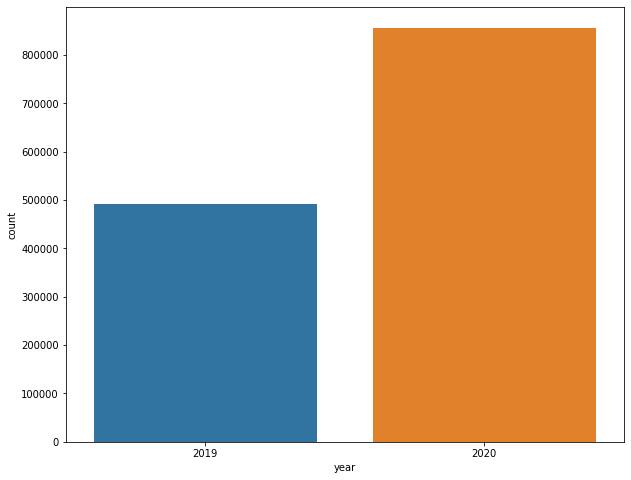

In [31]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='year', data=df)

In [32]:
df['month_of_year'] = df['date_dt'].dt.month_name()

In [33]:
df['month_of_year'][0]

'December'

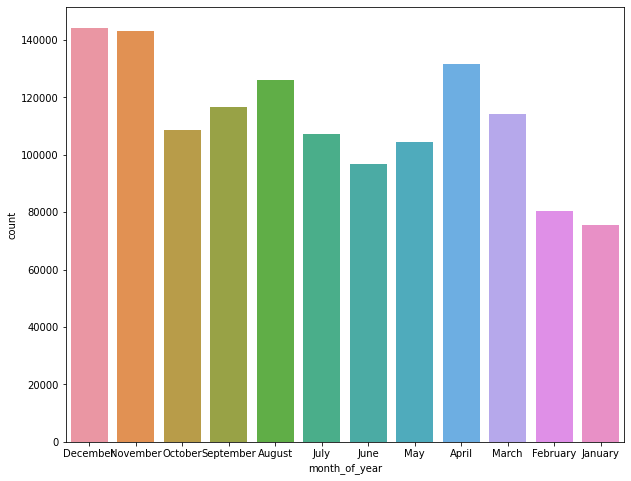

In [34]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='month_of_year', data=df)
# reorder month

In [35]:
df['day_of_week'] = df['date_dt'].dt.day_name()

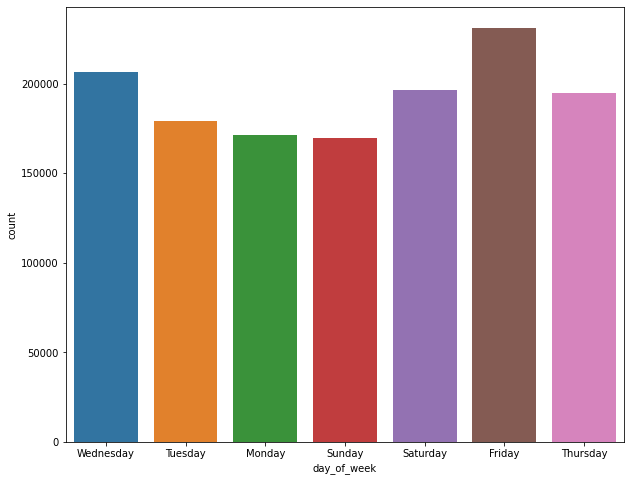

In [36]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='day_of_week', data=df)
# reorder day

In [37]:
df['time_dt']=pd.to_datetime(df['time'], format='%H:%M:%S')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349239 entries, 0 to 1349238
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date           1349239 non-null  object        
 1   time           1349239 non-null  object        
 2   username       1349239 non-null  object        
 3   tweet          1349239 non-null  object        
 4   date_dt        1349239 non-null  datetime64[ns]
 5   year           1349239 non-null  int64         
 6   month_of_year  1349239 non-null  object        
 7   day_of_week    1349239 non-null  object        
 8   time_dt        1349239 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 102.9+ MB


In [39]:
df['hour'] = df['time_dt'].dt.hour

In [40]:
df.head()

,date,time,username,tweet,date_dt,year,month_of_year,day_of_week,time_dt,hour
0,2020-12-30,18:59:32,ubetnot1,@FaZeApex @DoorDash That one you got there loo...,2020-12-30,2020,December,Wednesday,1900-01-01 18:59:32,18
1,2020-12-30,18:58:52,chungdaveeed,@doordash_ i listen while studying,2020-12-30,2020,December,Wednesday,1900-01-01 18:58:52,18
2,2020-12-30,18:58:41,dida34,Open until 10pm 2115 S State St https://t.co/...,2020-12-30,2020,December,Wednesday,1900-01-01 18:58:41,18
3,2020-12-30,18:58:34,mikeyaeger38,Doordash time.,2020-12-30,2020,December,Wednesday,1900-01-01 18:58:34,18
4,2020-12-30,18:58:26,lebronsleague,@damemorris95 Haha i feel u😂. Always got DoorD...,2020-12-30,2020,December,Wednesday,1900-01-01 18:58:26,18


In [41]:
df['hour'].nunique()

24

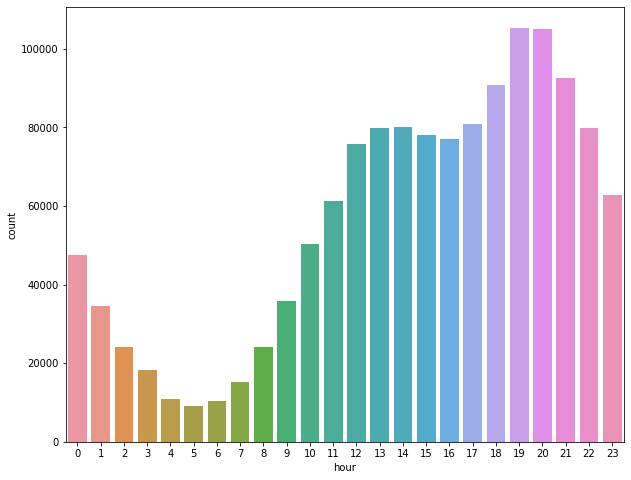

In [42]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='hour', data=df)

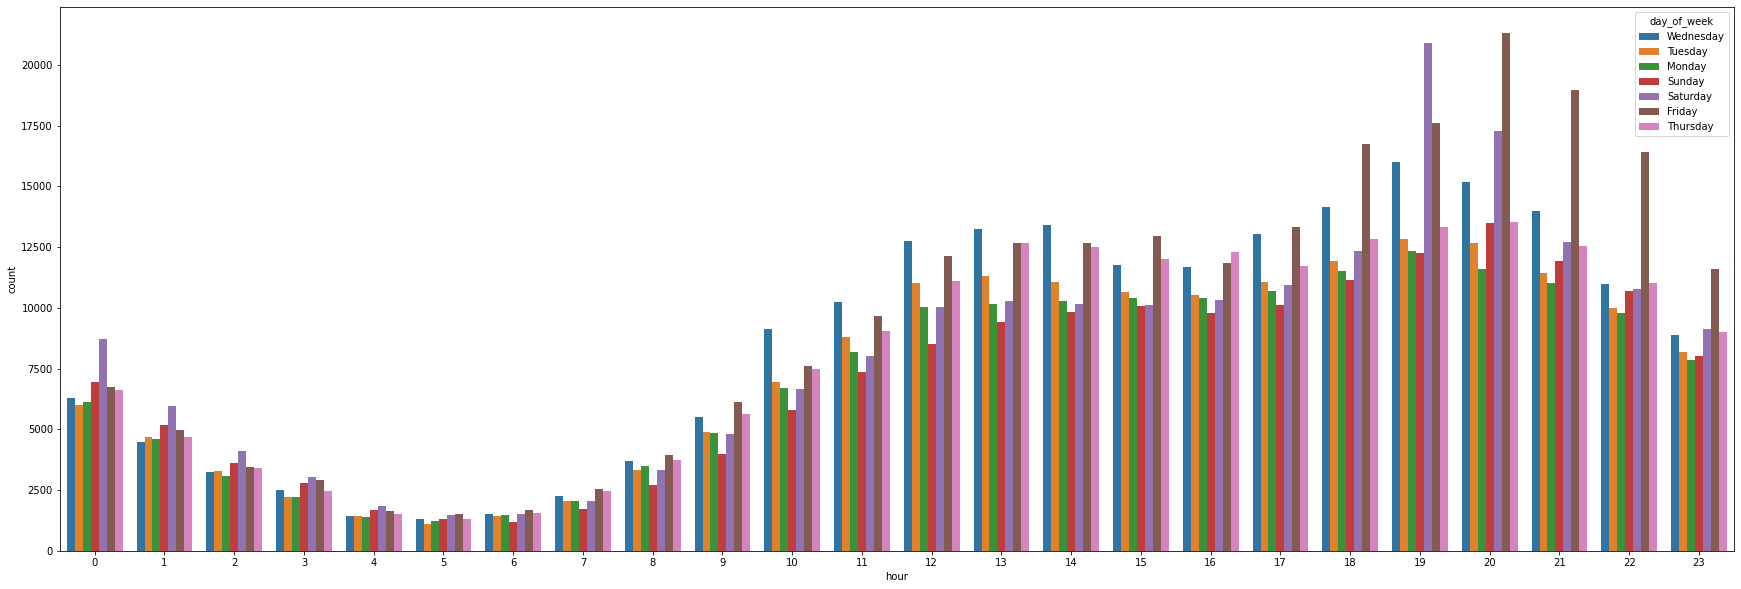

In [43]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='hour', hue="day_of_week", data=df)

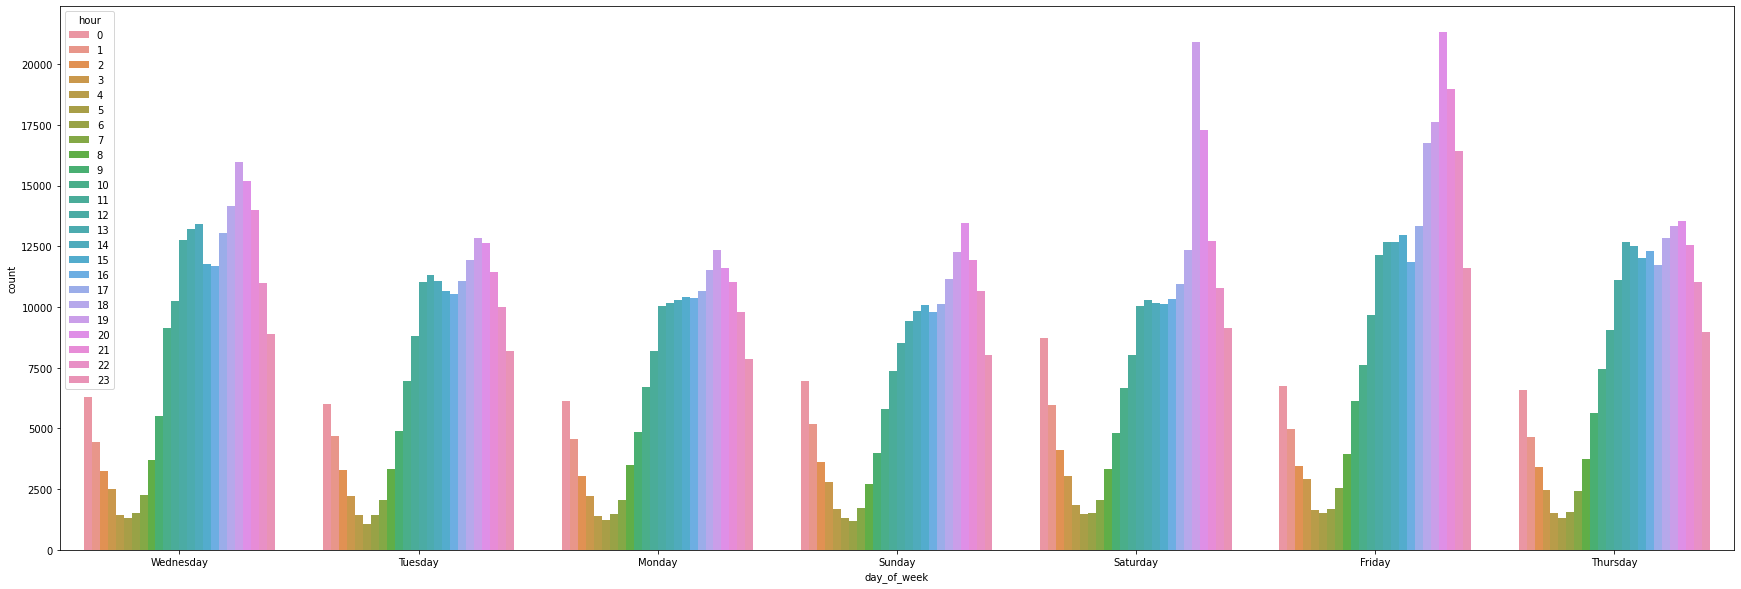

In [44]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day_of_week', hue="hour", data=df)

In [45]:
df['username'].value_counts().head(10)

doordash_help      65052
doordash            9468
bet                 4620
jcraiderman         4296
solg2004            2630
rideshareaz         2516
freelancedallas     2274
b3eqwxnjptmbbnw     1988
sahil_feda          1641
afreaknamedali      1442
Name: username, dtype: int64

In [46]:
df.duplicated().sum()

12

In [47]:
df[df.duplicated()==True]

,date,time,username,tweet,date_dt,year,month_of_year,day_of_week,time_dt,hour
219171,2020-10-25,14:08:31,lycanleopard,"well that meal was a bit of a bust, my order w...",2020-10-25,2020,October,Sunday,1900-01-01 14:08:31,14
311629,2020-09-14,02:38:43,tiana2237,Stop and read 🛑 get free $7 using this link ...,2020-09-14,2020,September,Monday,1900-01-01 02:38:43,2
311630,2020-09-14,02:38:43,tiana2237,Stop and read 🛑 get free $7 using this link ...,2020-09-14,2020,September,Monday,1900-01-01 02:38:43,2
821163,2020-01-25,15:14:48,flakyfool,@FoodCIips If you use code https://t.co/Gg0Z8...,2020-01-25,2020,January,Saturday,1900-01-01 15:14:48,15
888566,2019-12-07,13:52:53,dev7810,FREE $20 OFF DOORDASH PROMO CODE CODE #doordas...,2019-12-07,2019,December,Saturday,1900-01-01 13:52:53,13
888567,2019-12-07,13:52:53,dev7810,FREE $20 OFF DOORDASH PROMO CODE CODE #doordas...,2019-12-07,2019,December,Saturday,1900-01-01 13:52:53,13
888569,2019-12-07,13:52:52,dev7810,FREE $20 OFF DOORDASH PROMO CODE CODE #doordas...,2019-12-07,2019,December,Saturday,1900-01-01 13:52:52,13
888571,2019-12-07,13:52:51,dev7810,FREE $20 OFF DOORDASH PROMO CODE CODE #doordas...,2019-12-07,2019,December,Saturday,1900-01-01 13:52:51,13
888573,2019-12-07,13:52:51,dev7810,FREE $20 OFF DOORDASH PROMO CODE CODE https:/...,2019-12-07,2019,December,Saturday,1900-01-01 13:52:51,13
888574,2019-12-07,13:52:51,dev7810,FREE $20 OFF DOORDASH PROMO CODE CODE https:/...,2019-12-07,2019,December,Saturday,1900-01-01 13:52:51,13


In [51]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349227 entries, 0 to 1349226
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date           1349227 non-null  object        
 1   time           1349227 non-null  object        
 2   username       1349227 non-null  object        
 3   tweet          1349227 non-null  object        
 4   date_dt        1349227 non-null  datetime64[ns]
 5   year           1349227 non-null  int64         
 6   month_of_year  1349227 non-null  object        
 7   day_of_week    1349227 non-null  object        
 8   time_dt        1349227 non-null  datetime64[ns]
 9   hour           1349227 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 102.9+ MB


In [53]:
df.to_csv('clean_data.csv',index=False)